In [2]:
import pandas as pd
df = pd.read_csv('../data/dataset.csv')

print(f"Dataset charge: {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

Dataset charge: 20000 lignes, 15 colonnes


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [5]:
df.info()
# df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 2.3 MB


In [7]:
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquantes': missing.values,
})
missing_df = missing_df[missing_df['Manquantes'] > 0].sort_values('Manquantes', ascending=False)
print(missing_df)

    Colonne  Manquantes
14    tag_8       18093
13    tag_7       16072
12    tag_6       12649
11    tag_5        6909
10    tag_4        1539
0   subject        1461
9     tag_3          95
8     tag_2          46
2    answer           4
1      body           2


In [18]:
if 'type' in df.columns:
    type_counts = df['type'].value_counts()
    print(type_counts)
    print(f"\n Nombre de catégories: {df['type'].nunique()}")

type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64

 Nombre de catégories: 4


In [21]:
print("\nDistribution des types :")
print(df["type"].value_counts())


Distribution des types :
type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64


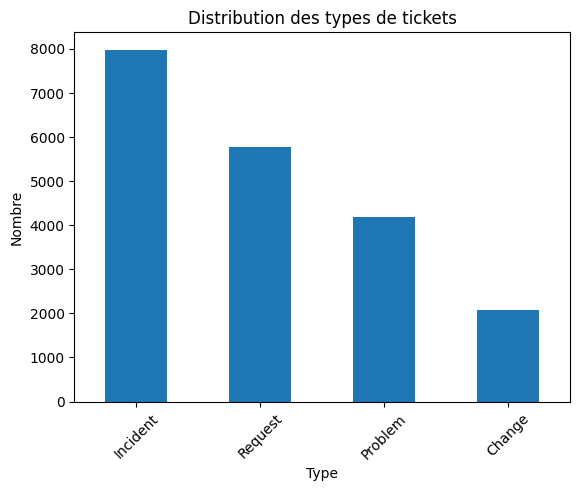

In [22]:
import matplotlib.pyplot as plt
# Visualisation
df["type"].value_counts().plot(kind="bar")
plt.title("Distribution des types de tickets")
plt.xlabel("Type")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.show()



Statistiques longueur :
count    20000.000000
mean       437.032700
std        250.291682
min          5.000000
25%        241.000000
50%        401.000000
75%        595.000000
max       2284.000000
Name: length, dtype: float64


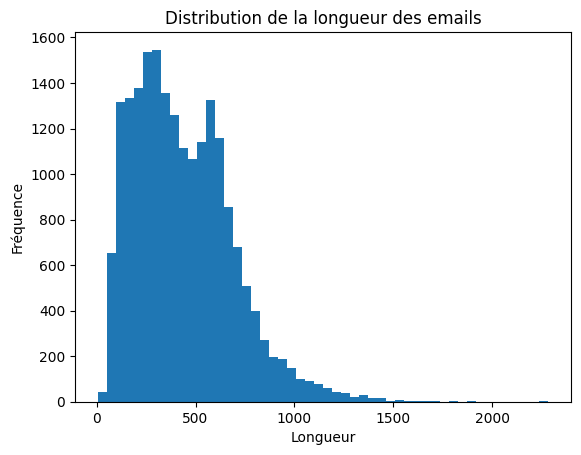

In [23]:
# Fusion des champs texte
df["text"] = df["subject"].fillna("") + " " + df["body"].fillna("")

# Longueur des emails (nombre de caractères)
df["length"] = df["text"].apply(len)

print("\nStatistiques longueur :")
print(df["length"].describe())

# Histogramme
plt.hist(df["length"], bins=50)
plt.title("Distribution de la longueur des emails")
plt.xlabel("Longueur")
plt.ylabel("Fréquence")
plt.show()


In [25]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('french'))
def clean_text(text):
    text = text.lower()   
    text = re.sub(r'[^\w\s]', '', text)    
    tokens = text.split()   
    tokens = [word for word in tokens if word not in stop_words]    
    
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

print("\nExemple texte nettoye :")
print(df["clean_text"].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Exemple texte nettoye :
0    unvorhergesehener absturz der datenanalyseplat...
1    customer support inquiry seeking information d...
2    data analytics for investment i am contacting ...
3    krankenhausdienstleistungproblem ein mediendat...
4    security dear customer support i am reaching o...
Name: clean_text, dtype: str


In [27]:
df.to_csv('../data/dataset_cleaned.csv', index=False)
print("dataset_cleaned.csv sauvegarde avec succes")

dataset_cleaned.csv sauvegarde avec succes
